# Setup Code
Before getting started we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook.

First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html?highlight=autoreload) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [ ]:
%load_ext autoreload
%autoreload 2

### Google Colab Setup
Next we need to run a few commands to set up our environment on Google Colab. If you are running this notebook on a local machine you can skip this section.

Run the following cell to mount your Google Drive. Follow the link, sign in to your Google account (the same account you used to store this notebook!) and copy the authorization code into the text box that appears below.

In [ ]:
# connect to self-drive
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


# Data processing

### Import the necessary library

In [ ]:
# intall package
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 KB 31.6 MB/s eta 0:00:00


In [ ]:
# import the package which we will use to programing
import os
import csv
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torchvision
import random
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import math

from PIL import Image
from google.colab import drive
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader, random_split
from torchmetrics.classification import MulticlassAccuracy
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split
import torch.utils.data as data
from torchvision import datasets


### Device
The using device below should be "cuda:0" as


```
Use device: cuda:0
```


We advice using cuda to train which is much quicker than cpu only in training process.

If not, please check and change the setting below

**Edit -> Notebook settings -> Hardware accelerator -> GPU**


In [ ]:
# use gpu if you have
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Use device:",device)

# set random seed
SEED = 6071
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)
torch.backends.cudnn.deterministic = True

Use device: cuda:0


### DataLoader

Here should do some processes on your data, we can apply the augmentation functions to make our data have more diversity which may be helpful to the accuracy.

**If you want to do the bonus question, you should try to implement the validation part and apply it in the training part.**


In [ ]:
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
features_train, features_test, targets_train, targets_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 42)

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor) # data type is long

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor) # data type is long

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

image shape= torch.Size([28, 28])
Label= tensor(5)


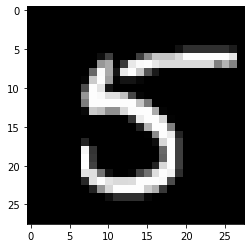

In [ ]:
image, label = train[0]
print("image shape=", image.shape)
print("Label=", label)
plt.imshow(image.reshape((28, 28)), cmap="gray")

### Please Change the batch_size in DataLoader

batch_size will also affect training step.

higher: faster, stable

but inprecise on optimize, may use large memory

**You should change the appropriate batch size.**

**The validation set has already been defined above, if you want to do the bonus question, you should try to apply it below.**

In [ ]:
# Loaded Datasets to DataLoaders

##############################################################################
#                    TODO: Validation Dataloader                             #
##############################################################################
batch_size = 100
train_loader = torch.utils.data.DataLoader(train, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test, batch_size = batch_size, shuffle = False)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

### View the picture from dataset


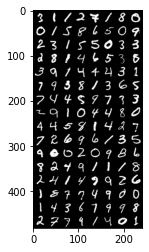

    3     1     1     2     7     1     8     0     0     1     5     8     6     5     0     9     2     3     1     5     5     0     3     3     2     8     1     4     6     5     3     8


In [ ]:
trainset = datasets.MNIST(root='./data', train=True, download=True, transform = transforms.Compose([transforms.ToTensor(),]))
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers = 2)
class_num = 10
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))

# Model


### Model design

Design your own model structure.

Here we would like you to practice Multi-Layer-Perceptron (MLP) which means you

can only use nn.linear() to design your model.

Please use nn.linear() to set the neuron numbers and net layers.

Hint: Activation functions can also be used, such as ReLU() and so on.

In [ ]:
##############################################
# Build your model here!
#
# Practice:
#   Try to implement MLP with pytorch !
##############################################
import torch.nn.functional as F
class trainmodel(nn.Module):
  def __init__(self):
    super(trainmodel, self).__init__()
    ##############################################################################
    #                    TODO: Complete the code                                 #
    ##############################################################################
    self.fc1 = nn.Linear(28*28, 50)
    self.fc1_drop = nn.Dropout(0.2)
    self.fc2 = nn.Linear(50, 50)
    self.fc2_drop = nn.Dropout(0.2)
    self.fc3 = nn.Linear(50, 10)
            ##############################################################################
            #                              END OF YOUR CODE                              #
            ##############################################################################

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = F.relu(self.fc1(x))
    x = self.fc1_drop(x)
    x = F.relu(self.fc2(x))
    x = self.fc2_drop(x)
    return F.log_softmax(self.fc3(x), dim=1)

        ##############################################################################
        #                              END OF YOUR CODE                              #
        ##############################################################################

model = trainmodel()

### Test model output

You can test your own model here.

Result should be

```
torch.Size([batch_size, class_num])
```



In [ ]:
print(model)

trainmodel(
  (fc1): Linear(in_features=784, out_features=50, bias=True)
  (fc1_drop): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=50, out_features=50, bias=True)
  (fc2_drop): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=50, out_features=10, bias=True)
)


### Parameter setting
Please change your own optimizer, learning rate and epochs.

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()   # the target label is not one-hotted
input_shape = (-1,1,28,28)
num_epochs=25

# Training
Here is the main process to train your model, you can complete the validation function to get the bonus.

In [ ]:
from torch.autograd import Variable
def fit_model(model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader):
    # Traning the Model
    #history-like list for store loss & acc value
    training_loss = []
    training_accuracy = []
    validation_loss = []
    validation_accuracy = []
    for epoch in range(num_epochs):
        #training model & store loss & acc / epoch
        correct_train = 0
        total_train = 0
        for i, (images, labels) in enumerate(train_loader):
            # 1.Define variables
            train = Variable(images.view(input_shape))
            labels = Variable(labels)
            # 2.Clear gradients
            optimizer.zero_grad()
            # 3.Forward propagation
            outputs = model(train)
            # 4.Calculate softmax and cross entropy loss
            train_loss = loss_func(outputs, labels)
            # 5.Calculate gradients
            train_loss.backward()
            # 6.Update parameters
            optimizer.step()
            # 7.Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # 8.Total number of labels
            total_train += len(labels)
            # 9.Total correct predictions
            correct_train += (predicted == labels).float().sum()
        #10.store val_acc / epoch
        train_accuracy = 100 * correct_train / float(total_train)
        training_accuracy.append(train_accuracy)
        # 11.store loss / epoch
        training_loss.append(train_loss.data)

        #evaluate model & store loss & acc / epoch
        correct_test = 0
        total_test = 0
        for images, labels in test_loader:
            # 1.Define variables
            test = Variable(images.view(input_shape))
            # 2.Forward propagation
            outputs = model(test)
            # 3.Calculate softmax and cross entropy loss
            val_loss = loss_func(outputs, labels)
            # 4.Get predictions from the maximum value
            predicted = torch.max(outputs.data, 1)[1]
            # 5.Total number of labels
            total_test += len(labels)
            # 6.Total correct predictions
            correct_test += (predicted == labels).float().sum()
        #6.store val_acc / epoch
        val_accuracy = 100 * correct_test / float(total_test)
        validation_accuracy.append(val_accuracy)
        # 11.store val_loss / epoch
        validation_loss.append(val_loss.data)
        print('Train Epoch: {}/{} Traing_Loss: {} Traing_acc: {:.6f}% Val_Loss: {} Val_accuracy: {:.6f}%'.format(epoch+1, num_epochs, train_loss.data, train_accuracy, val_loss.data, val_accuracy))
    return training_loss, training_accuracy, validation_loss, validation_accuracy

In [ ]:
training_loss, training_accuracy, validation_loss, validation_accuracy = fit_model(model, loss_func, optimizer, input_shape, num_epochs, train_loader, test_loader)

Train Epoch: 1/25 Traing_Loss: 0.2711620032787323 Traing_acc: 85.993752% Val_Loss: 0.3041965663433075 Val_accuracy: 89.400002%
Train Epoch: 2/25 Traing_Loss: 0.18779201805591583 Traing_acc: 90.583336% Val_Loss: 0.21404032409191132 Val_accuracy: 90.991669%
Train Epoch: 3/25 Traing_Loss: 0.18509911000728607 Traing_acc: 91.677086% Val_Loss: 0.2204071432352066 Val_accuracy: 91.300003%
Train Epoch: 4/25 Traing_Loss: 0.21751698851585388 Traing_acc: 91.768753% Val_Loss: 0.1246684193611145 Val_accuracy: 91.766670%
Train Epoch: 5/25 Traing_Loss: 0.35034674406051636 Traing_acc: 92.404167% Val_Loss: 0.1729166954755783 Val_accuracy: 91.925003%
Train Epoch: 6/25 Traing_Loss: 0.4096752107143402 Traing_acc: 92.675003% Val_Loss: 0.27258071303367615 Val_accuracy: 91.941666%
Train Epoch: 7/25 Traing_Loss: 0.20572103559970856 Traing_acc: 92.816666% Val_Loss: 0.20017850399017334 Val_accuracy: 91.708336%
Train Epoch: 8/25 Traing_Loss: 0.1634458750486374 Traing_acc: 93.020836% Val_Loss: 0.14420825242996216 

# Plot the Loss & Accuracy curve (Including bonus parts)

The followed plots will show the training accuracy and loss curves; however, if you would like to do the bonus part, you have to add the validation accuracy and loss curves on the plots.

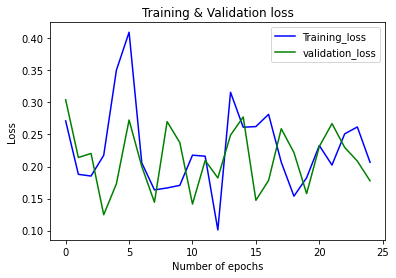

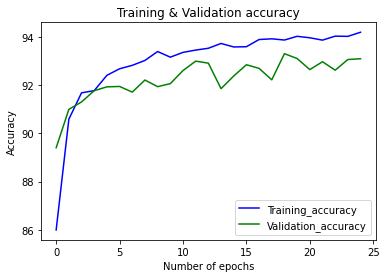

In [ ]:
plt.plot(range(num_epochs), training_loss, 'b-', label='Training_loss')
plt.plot(range(num_epochs), validation_loss, 'g-', label='validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(num_epochs), training_accuracy, 'b-', label='Training_accuracy')
plt.plot(range(num_epochs), validation_accuracy, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Test the accuracy on testing dataset

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data[0], data[1]
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print('Accuracy of the network on the 10000 test images: %f %%' % (100 * correct / total))

Accuracy of the network on the 10000 test images: 95.791667 %


# (Bonus) Complete the Confusion matrix

You can complete the Confusion matrix here to get the bonus.

In [ ]:
import time
model.eval()
y_pred = []
y_true = []
with torch.no_grad():
  end = time.time()
  for images, labels in test_loader:
      test = Variable(images.view(input_shape))
      outputs = model(test)
      _, preds = torch.max(outputs, 1)
      loss = loss_func(outputs, labels)

      y_pred.extend(preds.view(-1).detach().cpu().numpy())
      y_true.extend(labels.view(-1).detach().cpu().numpy())

In [ ]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)

In [ ]:
per_cls_acc = cf_matrix.diagonal()/cf_matrix.sum(axis=0)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(class_names)
print(per_cls_acc)
print("Plot confusion matrix")

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
[0.97527707 0.96433878 0.9516129  0.98022356 0.96762905 0.94689469
 0.97357204 0.96594427 0.9257384  0.92799353]
Plot confusion matrix


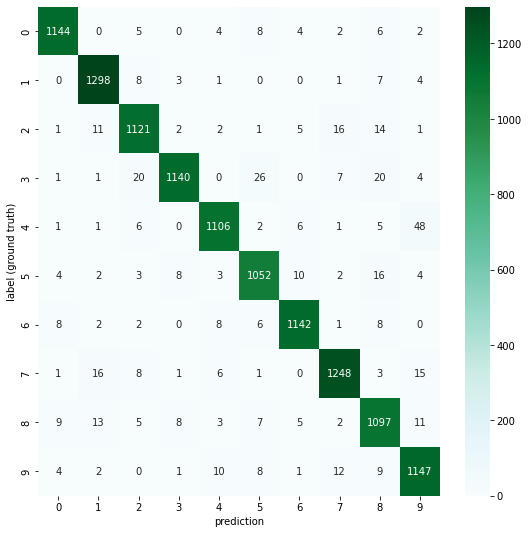

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cf_matrix, class_names, class_names)
plt.figure(figsize = (9,9))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='BuGn')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.savefig("confusion_matrix.png")